In [115]:
import numpy as np
import pandas as pd
import os

In [116]:
df = pd.read_csv('datasets/weather_sanjose.csv', parse_dates=True)
df.head()

,STATION,NAME,DATE,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,SNOW,...,WT09,WT10,WT11,WT13,WT14,WT16,WT18,WT21,WV01,WV03
0,USC00047916,"SANTA CRUZ, CA US",1910-01-01,NaN,NaN,NaN,NaN,NaN,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00047916,"SANTA CRUZ, CA US",1910-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00047916,"SANTA CRUZ, CA US",1910-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00047916,"SANTA CRUZ, CA US",1910-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00047916,"SANTA CRUZ, CA US",1910-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
city = 'SAN JOSE, CA US'

df_sanjose = df[df['NAME'] == city]

df_sanjose = df_sanjose[['DATE','TMAX']]

df_sanjose.set_index('DATE', drop=True, inplace=True)

df_sanjose.index = pd.to_datetime(df_sanjose.index)

df_sanjose.sort_index(inplace=True)

df_sanjose.dropna(inplace=True)

df_sanjose = df_sanjose[~df_sanjose.index.duplicated(keep='first')]

df_sanjose.head()


,TMAX
DATE,
1910-01-01,48.0
1910-01-02,47.0
1910-01-03,48.0
1910-01-04,47.0
1910-01-05,46.0


In [118]:
from pyextremes import __version__, EVA, get_extremes
from pyextremes.models import Emcee
from pyextremes.plotting import (
    plot_extremes,
    pyextremes_rc,
    plot_trace,
    plot_corner,
)

In [119]:
series = df_sanjose[['TMAX']].squeeze()
series = series.loc[:pd.to_datetime("2021-12-30")]



In [120]:
model = EVA(series)
model.get_extremes(method='BM', block_size='365.24D')

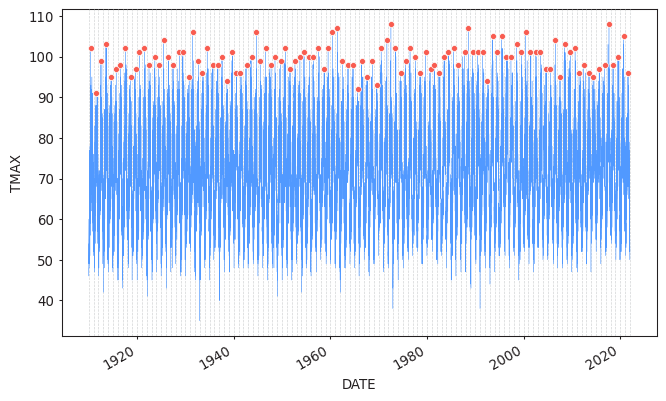

In [129]:
fig, ax = model.plot_extremes()
fig.savefig("figures/temp_extremes.png", bbox_inches="tight")

In [122]:
model.fit_model()

In [123]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

In [124]:
print(summary)

               return value    lower ci    upper ci
return period                                      
1.0               87.345839 -251.455995   90.274518
2.0               99.614762   98.968460  107.288408
5.0              102.619871  101.872454  107.930893
10.0             104.208480  103.341713  107.985556
25.0             105.850776  104.827210  107.998013
50.0             106.851464  105.715035  107.999760
100.0            107.692636  106.265223  108.964270
250.0            108.607624  106.978144  110.256415
500.0            109.177708  106.999998  111.169696
1000.0           109.660931  107.000000  112.016242


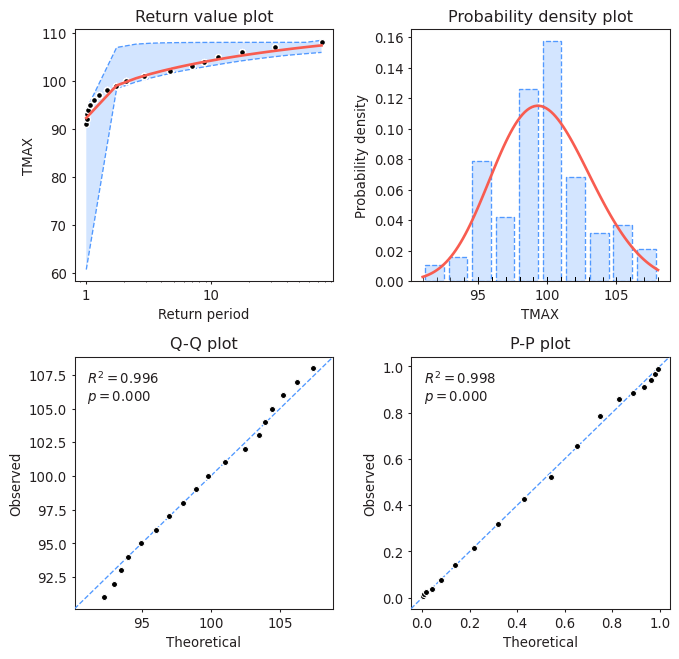

In [130]:
fig, ax = model.plot_diagnostic(alpha=0.95)
fig.savefig("figures/analysis_extreme_model.png", bbox_inches="tight")

In [126]:
print(model)

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          TMAX      Size:                              40,681
Start:                       January 1910      End:                        December 2021
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                112      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:45:36
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

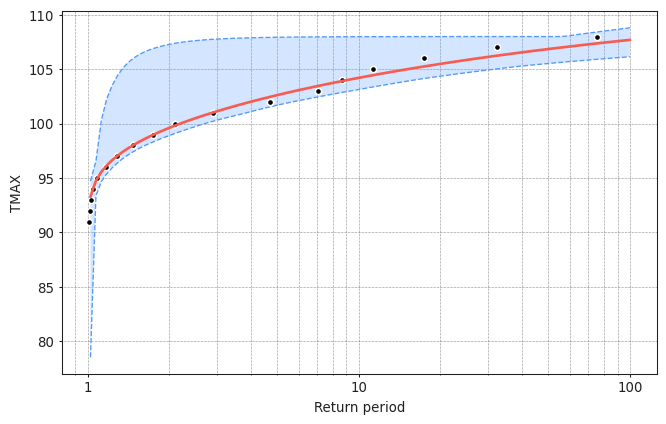

In [131]:
fig, ax = model.plot_return_values(
    return_period=np.logspace(0.01, 2, 100),
    return_period_size="365.2425D",
    alpha=0.95,
)

fig.savefig("figures/return_period.png", bbox_inches="tight")